# Exploring and processing data

In [3]:
import numpy as np
import pandas as pd
import os

## Import data

In [4]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [5]:
train_df = pd.read_csv(train_file_path, index_col = "PassengerId")
test_df = pd.read_csv(test_file_path, index_col = "PassengerId")

In [8]:
print(f"The dataset has {train_df.shape[0]} observations and {train_df.shape[1]} features")

The dataset has 891 observations and 11 features


In [10]:
print(f"The dataset has {test_df.shape[0]} observations and {test_df.shape[1]} features")

The dataset has 418 observations and 10 features


## Basic structure of data

In [13]:
# The columns in the training dataset
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**SibSp**- Number of sibling/spouses aboard, **Pclass** - Passenger class (1 - 1st Class, 2 - 2nd Class, 3 - 3rd Class), **Parch** - Number of parents/children aboard, **Ticket** - Ticket number, **Embarked** - point of embarkment ( C - Cherbourg, Q - Queenstown, S - Southampton) 

In [14]:
# Data types for each column
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [15]:
# Statistics for non-string columns
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Number of nulls per column
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
# Test data columns
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [19]:
# Data types of each column
test_df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [20]:
# Number of nulls per column
test_df.isnull().sum() # OR test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [22]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
test_df['Survived'] = -1 # Column added to make the test and train datas have similar structure, -1 is an arbitrary value

In [27]:
df = pd.concat([train_df, test_df])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Selecting columns

In [31]:
# Single column
df.Name # OR df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [32]:
# Multiple columns
df[["Name", "Age"]]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


### Indexing

Use **.loc** for label indexing

In [35]:
df.loc[5:10,"Age":"Fare"] # Selecting column range

,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,
5,35.0,0,0,373450,8.0500
6,NaN,0,0,330877,8.4583
7,54.0,0,0,17463,51.8625
8,2.0,3,1,349909,21.0750
9,27.0,0,2,347742,11.1333
10,14.0,1,0,237736,30.0708


In [36]:
df.loc[5:10, ] # Selecting all columns for rows with index 5 to 10

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
df.loc[5:10, ['Survived', 'Pclass', 'Parch']] # Selecting discrete columns

,Survived,Pclass,Parch
PassengerId,,,
5,0,3,0
6,0,3,0
7,0,1,0
8,0,3,1
9,1,3,2
10,1,2,0


Use **.iloc** for position indexing

In [40]:
df.iloc[5:10, 3:8]

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


In [41]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-0.058060,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.760044,0.837836,14.413493,1.041658,0.865560,51.758668
min,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-1.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [45]:
df.Fare.std()

51.75866823917414

In [46]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,-0.058060,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.760044,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,-1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,-1.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [50]:
df.Embarked.value_counts() # the count of the unique values in a categorical column

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [51]:
df.Sex.value_counts(normalize=True) # gives the proportions of the categorical data

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [54]:
df[df['Survived']!= -1].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

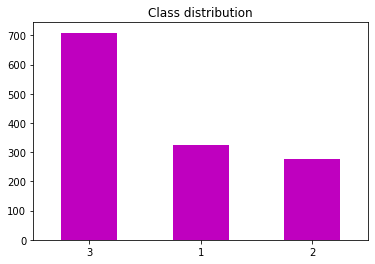

In [57]:
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Class distribution', color='m');# ; suppresses matplotlib output